In [1]:
import numpy as np
import pandas as pd
import scipy.special

import altair as alt

import bootcamp_utils

In [5]:
df = pd.read_csv('data/retina_spikes.csv', comment='#')

df.head()

,t (ms),V (uV)
0,703.96,4.79
1,704.00,-0.63
2,704.04,5.83
3,704.08,0.31
4,704.12,-4.58


In [6]:
alt.Chart(df
    ).mark_line(
    ).encode(
        x='t (ms):Q',
        y=alt.Y('V (uV):Q', title='V (µV)')
    )

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

Chart({
  data:         t (ms)  V (uV)
  0       703.96    4.79
  1       704.00   -0.63
  2       704.04    5.83
  3       704.08    0.31
  4       704.12   -4.58
  5       704.16   21.67
  6       704.20    8.13
  7       704.24    5.94
  8       704.28   14.79
  9       704.32    2.71
  10      704.36    0.94
  11      704.40   17.40
  12      704.44   11.77
  13      704.48   -2.60
  14      704.52    6.04
  15      704.56   -3.44
  16      704.60   -6.04
  17      704.64   10.42
  18      704.68   19.06
  19      704.72    7.40
  20      704.76    9.79
  21      704.80   20.42
  22      704.84   -0.10
  23      704.88   -7.92
  24      704.92   -7.29
  25      704.96  -11.25
  26      705.00  -12.19
  27      705.04   12.60
  28      705.08   -1.98
  29      705.12  -10.31
  ...        ...     ...
  19971  1502.80  -11.04
  19972  1502.84   -2.92
  19973  1502.88   -6.46
  19974  1502.92  -11.98
  19975  1502.96   -2.40
  19976  1503.00   -2.81
  19977  1503.04  -16.67
  19978  15

In [7]:
#how big IS the dataframe?
len(df)

20001

In [8]:
#I guess we'll plot a smaller chunk of the df
df = pd.read_csv('data/retina_spikes.csv', comment='#')
df = df.iloc[:1000, :]
#.iloc works to index numerically rather than dealing with values in the df

df.head()

,t (ms),V (uV)
0,703.96,4.79
1,704.00,-0.63
2,704.04,5.83
3,704.08,0.31
4,704.12,-4.58


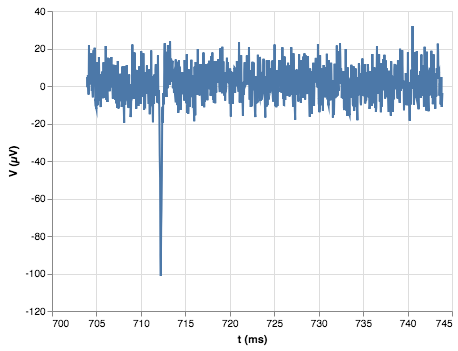

In [13]:
alt.Chart(df
    ).mark_line(
    ).encode(
        x='t (ms):Q',
        y=alt.Y('V (uV):Q', title='V (µV)')
    )

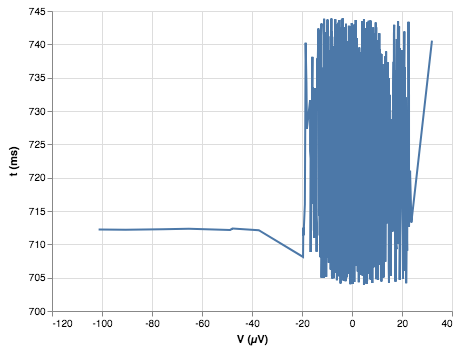

In [17]:
#but we want it to be vertical
alt.Chart(df
    ).mark_line(
    ).encode(
        y=alt.Y('t (ms):Q', scale=alt.Scale(zero=False)), 
        x=alt.X('V (uV):Q', title='V (µV)')
    )

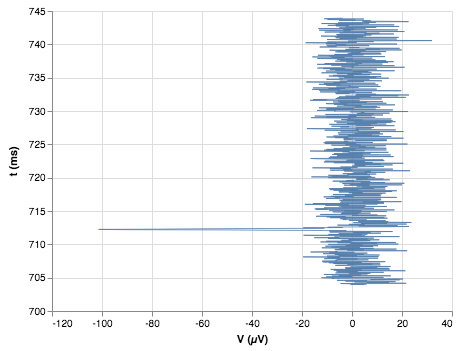

In [25]:
#this is a problem beceause it's connecting datapoints but not in the correct order
#but we want it to be vertical
alt.Chart(df
    ).mark_line(
        strokeWidth=0.75
    ).encode(
        y=alt.Y('t (ms):Q', scale=alt.Scale(zero=False)), 
        x=alt.X('V (uV):Q', title='V (µV)'),
        order=alt.Order('t (ms):Q', sort='ascending')
    )

In [38]:
# for a smooth plot

# we need the x-values
# np.linspace gives a given number of points (400) betwen start and end points (-15 and 15), and when connected, they will look smooth. You can do more or less, but 400 works well
x = np.linspace(-15, 15, 400)

# now le'ts get y values we'll use
# the normalized intensity of an airydisk
norm_I = 4 * (scipy.special.j1(x) / x)**2

In [39]:
#those are both numpy arrays, but we need them in a pandas df to use altair
df_airy = pd.DataFrame(data={'x': x,
                             'norm_I': norm_I})
#keys are column headings, and values populate below

df_airy.head()

,x,norm_I
0,-15.000000,0.000748
1,-14.924812,0.000767
2,-14.849624,0.000777
3,-14.774436,0.000779
4,-14.699248,0.000772


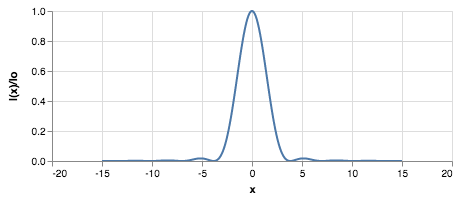

In [40]:
alt.Chart(df_airy,
          height=150
    ).mark_line(
    ).encode(
        x='x:Q',
        y=alt.Y('norm_I:Q', title='I(x)/Io'),
        order='x:Q'
    )

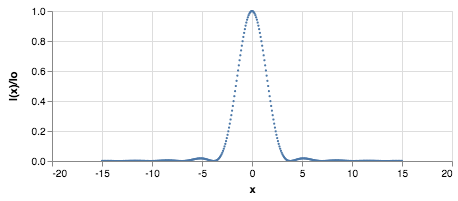

In [41]:
alt.Chart(df_airy,
          height=150
    ).mark_point(
        size=5,
        filled=True,
        opacity=1
    ).encode(
        x='x:Q',
        y=alt.Y('norm_I:Q', title='I(x)/Io'),
        order='x:Q'
    )

In [42]:
#ECDF time!

df = pd.read_csv('data/gfmt_sleep.csv', comment='#')
df['insomnia'] = df['sci'] <= 16

In [43]:
bootcamp_utils.ecdf_y??

Signature: bootcamp_utils.ecdf_y(data)
Source:   
def ecdf_y(data):
    """Give y-values of an ECDF for an unsorted column in a data frame.
    
    Parameters
    ----------
    data : Pandas Series
        Series (or column of a DataFrame) from which to generate ECDF
        values

    Returns
    -------
    output : Pandas Series
        Corresponding y-values for an ECDF when plotted with dots.

    Notes
    -----
    .. This only works for plotting an ECDF with points, not for formal
       ECDFs
    """
    return data.rank(method='first') / len(data)
File:      ~/git/bootcamp/modules/bootcamp_utils/bootcamp_utils/viz.py
Type:      function


In [46]:
grouped = df.groupby('insomnia')
df['percent correct ecdf_y grouped by insomnia'] = (
    grouped['percent correct'].transform(bootcamp_utils.ecdf_y))

In [47]:
df.head()

,participant number,gender,age,correct hit percentage,correct reject percentage,percent correct,confidence when correct hit,confidence incorrect hit,confidence correct reject,confidence incorrect reject,confidence when correct,confidence when incorrect,sci,psqi,ess,insomnia,percent correct ecdf_y grouped by insomnia
0,8,f,39,65,80,72.5,91.0,90,93.0,83.5,93.0,90,9,13,2,True,0.44
1,16,m,42,90,90,90.0,75.5,55.5,70.5,50,75.0,50,4,11,7,True,0.84
2,18,f,31,90,95,92.5,89.5,90,86.0,81,89.0,88,10,9,3,True,0.92
3,22,f,35,100,75,87.5,89.5,*,71.0,80,88.0,80,13,8,20,True,0.76
4,27,f,74,60,65,62.5,68.5,49,61.0,49,65.0,49,13,9,12,True,0.12


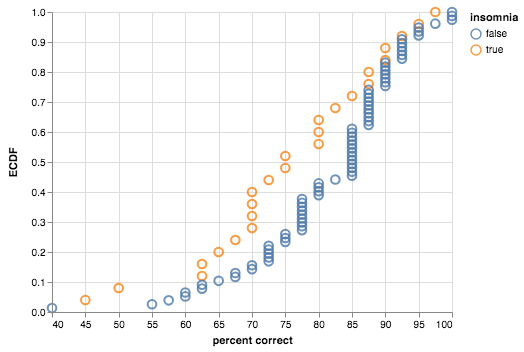

In [61]:
alt.Chart(df,
    ).mark_point(
        opacity=0.8,
        size=75
    ).encode(
        x=alt.X('percent correct:Q', scale=alt.Scale(zero=False)),
        y=alt.Y('percent correct ecdf_y grouped by insomnia:Q',
               title='ECDF'),
        color='insomnia'
    )

Looks like these don't really plateau at 1 anywhere in the dataset, so these data don't really show a gaussian distribution
We can see that the ECDF shifts left upon insomnia!

This plot is the dot representation, which is the same info as the formal "step" version, and either is fine
Justin also write the formal "step" version

In [62]:
df_ecdf = bootcamp_utils.ecdf_dataframe(df,
                                        'percent correct',
                                       color='insomnia',
                                       )

In [63]:
df_ecdf

,insomnia,percent correct,ECDF
0,False,40.0,0.012987
1,False,55.0,0.025974
2,False,57.5,0.038961
3,False,60.0,0.051948
4,False,60.0,0.064935
5,False,62.5,0.077922
6,False,62.5,0.090909
7,False,65.0,0.103896
8,False,67.5,0.116883
9,False,67.5,0.129870
